
##**Estudio datasets Netflix**
---
📋 Elaborado por: Paola Santiago

🔗 [Repositorio de github](https://github.com/PaolaSantiago00/Prueba-BI-bistre)



##**Introducción**


---
En el siguiente proyecto se analizarán 4 datasets diferentes donde se sacarán insights para la mejor toma de decisiones.

Los datasets con formato csv, son los siguientes:
*   data_Netflix
*   Actores
*   Mejores películas Netflix
*   Mejores shows Netflix






##**Desarrollo**


---

In [64]:
#Importación de librerias
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

#*Data Netflix*

In [65]:
#Lectura de dataset: data_netflix

from google.colab import drive
drive.mount('/content/drive')

df_data_netflix = pd.read_csv('/content/drive/MyDrive/Prueba Axity/data_netflix.csv')
df_data_netflix.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


#Columnas relevantes para el análisis del dataset "data netflix"

*type (¿Qué tipo de entretenimiento destaca más, pelicula o show?)

*runtime (Promedio de duración de las pelicula o shows)

*genres (¿Qué tipo de género es el más usual en Netflix?)

*production_countries (Qué país es el que tiene más producciones?)


In [66]:
#Investigamos con cuantas filas y columnas cuenta el dataset
num_filas_np, num_columnas_np = df_data_netflix.shape

print("Número de filas:", num_filas_np)
print("Número de columnas:", num_columnas_np)

Número de filas: 5806
Número de columnas: 12


In [67]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in df_data_netflix.columns:
    print(nombre_columna)

Nombres de las columnas:
id
title
type
release_year
age_certification
runtime
genres
production_countries
seasons
imdb_id
imdb_score
imdb_votes


In [68]:
#info de datos
df_data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   release_year          5806 non-null   int64  
 4   age_certification     3196 non-null   object 
 5   runtime               5806 non-null   int64  
 6   genres                5806 non-null   object 
 7   production_countries  5806 non-null   object 
 8   seasons               2047 non-null   float64
 9   imdb_id               5362 non-null   object 
 10  imdb_score            5283 non-null   float64
 11  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 544.4+ KB


#¿Qué tipo de entretenimiento destaca más, pelicula o show?

In [69]:
# Extraer los datos únicos de la columna "type" y contarlos
unique_types = df_data_netflix["type"].unique()
type_counts = df_data_netflix["type"].value_counts()

# Imprimir los resultados
print("Datos únicos en la columna 'type':", unique_types)
print("Conteo de cada tipo:")
print(type_counts)

#Convertir datos a porcentaje
type_percentages = type_counts * 100 / type_counts.sum()
for type, percentage in zip(type_counts.index, type_percentages):
  print(f"{type}: {percentage:.2f}%")




Datos únicos en la columna 'type': ['SHOW' 'MOVIE']
Conteo de cada tipo:
type
MOVIE    3759
SHOW     2047
Name: count, dtype: int64
MOVIE: 64.74%
SHOW: 35.26%


Vemos que el portal de Netflix cuenta más películas  con un porcentaje de 64.74% y un 35.26% en shows.

<ipython-input-70-9093eed5c2b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette= ["#a1c9f4", "#8de5a1"])


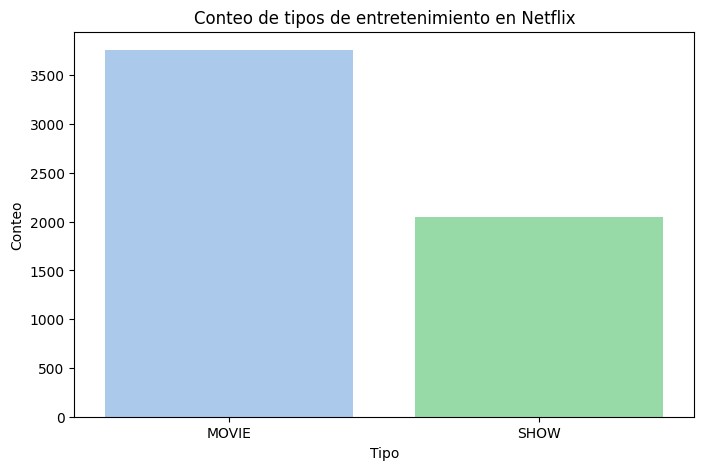

In [70]:

# Graficar los conteos de "type" con un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette= ["#a1c9f4", "#8de5a1"])
plt.title("Conteo de tipos de entretenimiento en Netflix")
plt.xlabel("Tipo")
plt.ylabel("Conteo")
plt.show()


#Promedio de duración en películas y shows

In [71]:
#Promedio en tiempo de las películas y shows

prom_peli = df_data_netflix[df_data_netflix["type"] == "MOVIE"]["runtime"].mean().round()
prom_show = df_data_netflix[df_data_netflix["type"] == "SHOW"]["runtime"].mean().round()

print(f'{"El Promedio de duración de las películas es de:" ,prom_peli}minutos')
print(f'{"El Promedio de duración de los shows es de:" ,prom_show}minutos')

('El Promedio de duración de las películas es de:', 99.0)minutos
('El Promedio de duración de los shows es de:', 39.0)minutos


#Tiempo máx y mín en duración de una película y show

In [72]:
#Máx y Mín duración de una película y show

max_peli = df_data_netflix[df_data_netflix["type"] == "MOVIE"]["runtime"].max()
min_peli = df_data_netflix[df_data_netflix["type"] == "MOVIE"]["runtime"].min()

max_show = df_data_netflix[df_data_netflix["type"] == "SHOW"]["runtime"].max()
min_show = df_data_netflix[df_data_netflix["type"] == "SHOW"]["runtime"].min()

print(f'{"La duración máxima de una película es de:" ,max_peli}minutos')
print(f'{"La duración mínima de una película es de:" ,min_peli}minutos')


print(f'{"La duración máxima de un show es de:" ,max_show}minutos')
print(f'{"La duración mínima de un show es de:" ,min_show}minutos')


('La duración máxima de una película es de:', 251)minutos
('La duración mínima de una película es de:', 3)minutos
('La duración máxima de un show es de:', 225)minutos
('La duración mínima de un show es de:', 0)minutos


In [73]:
#Sacar valores unicos de los géneros
unique_types_genres = df_data_netflix["genres"].unique()
print(unique_types_genres)

["['documentation']" "['crime', 'drama']" "['comedy', 'fantasy']" ...
 "['crime', 'comedy', 'drama', 'thriller', 'action']"
 "['music', 'romance', 'comedy']" "['family', 'comedy', 'animation']"]


#Top 5 de generos favoritos para Netflix

In [74]:
#Géneros favoritos

# Extraer los datos únicos de la columna "genres" y contarlos

type_counts_genres = df_data_netflix["genres"].value_counts().head(6)

# Imprimir los resultados

print("Conteo de cada tipo:")
print(type_counts_genres)


Conteo de cada tipo:
genres
['comedy']             510
['drama']              350
['documentation']      320
['comedy', 'drama']    141
['drama', 'comedy']    128
['reality']            120
Name: count, dtype: int64


<ipython-input-75-ce42ae9d8953>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts_genres.index, y=type_counts_genres.values, palette= ["#a1c9f4", "#8de5a1"])
<ipython-input-75-ce42ae9d8953>:3: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=type_counts_genres.index, y=type_counts_genres.values, palette= ["#a1c9f4", "#8de5a1"])


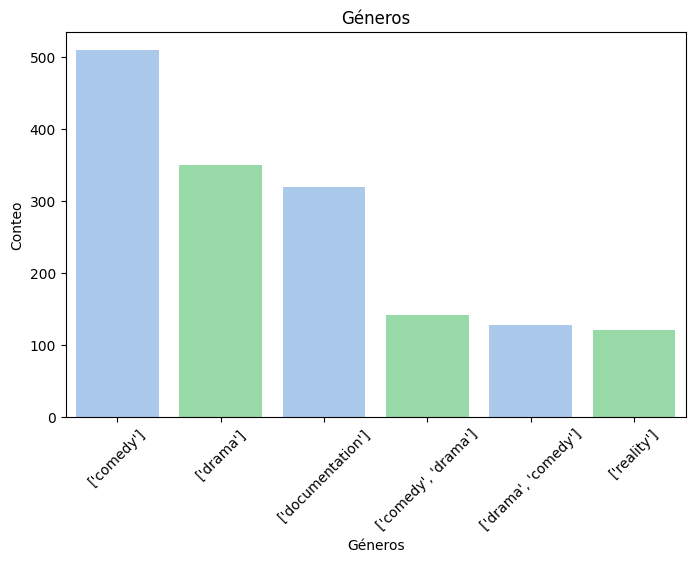

In [75]:
# Graficar los conteos de "type" con un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts_genres.index, y=type_counts_genres.values, palette= ["#a1c9f4", "#8de5a1"])
plt.title("Géneros")
plt.xlabel("Géneros")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.show()

#País líder en producción de películas y shows

In [76]:
#Conteo de películas y shows por país
movie_max = df_data_netflix[df_data_netflix["type"] == "MOVIE"]["production_countries"].value_counts().head(1)


show_max = df_data_netflix[df_data_netflix["type"] == "SHOW"]["production_countries"].value_counts().head(1)


print(f'{"País lider en películas es:" ,movie_max}')


print(f'{"País lider en shows es:" ,show_max}')



('País lider en películas es:', production_countries
['US']    1206
Name: count, dtype: int64)
('País lider en shows es:', production_countries
['US']    744
Name: count, dtype: int64)


In [77]:
#Producciones por país

# Extraer los datos únicos de la columna "production_countries"

type_counts_countries = df_data_netflix["production_countries"].value_counts().head(3)

# Imprimir los resultados

print("Conteo por país:")
print(type_counts_countries)

Conteo por país:
production_countries
['US']    1950
['IN']     605
['JP']     266
Name: count, dtype: int64


<ipython-input-78-ab7b4bffd093>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts_countries.index, y=type_counts_countries.values,palette= ["#a1c9f4", "#8de5a1"] )
<ipython-input-78-ab7b4bffd093>:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=type_counts_countries.index, y=type_counts_countries.values,palette= ["#a1c9f4", "#8de5a1"] )


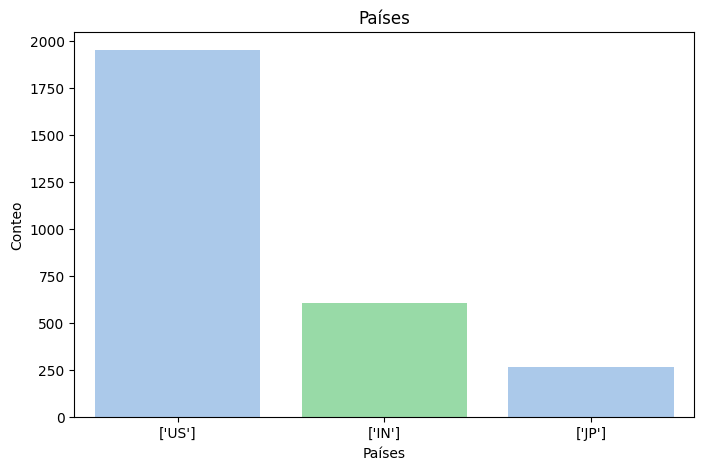

In [78]:
# Graficar los conteos de "type" con un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts_countries.index, y=type_counts_countries.values,palette= ["#a1c9f4", "#8de5a1"] )
plt.title("Países")
plt.xlabel("Países")
plt.ylabel("Conteo")
plt.show()

___
___
___

#*Actores*

In [79]:
#Lectura de dataset: actores
from google.colab import drive
drive.mount('/content/drive')

df_actores = pd.read_csv('/content/drive/MyDrive/Prueba Axity/Actores.csv')
df_actores.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


#Columnas relevantes para el análisis del dataset "Actores"

*name (nombre del actor con más películas)



In [80]:
#Investigamos con cuantas filas y columnas cuenta el dataset
num_filas_np, num_columnas_np = df_actores.shape

print("Número de filas:", num_filas_np)
print("Número de columnas:", num_columnas_np)

Número de filas: 77213
Número de columnas: 5


In [81]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in df_actores.columns:
    print(nombre_columna)

Nombres de las columnas:
person_id
id
name
character
role


In [82]:
#Información de df_actores
df_actores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


#Principales nombres de actores y directores

#Participación de actores y directores

In [83]:
#Conteo de participación  por nombre de actor o director
names= df_actores['name'].value_counts().head(10)
names

name
Shah Rukh Khan           30
Anupam Kher              25
Boman Irani              25
Kareena Kapoor Khan      25
Paresh Rawal             22
Takahiro Sakurai         22
Nawazuddin Siddiqui      21
Priyanka Chopra Jonas    21
Raúl Campos              21
Jan Suter                20
Name: count, dtype: int64

<ipython-input-84-f87d449f87fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names.index, y=names.values, palette=["#a1c9f4", "#8de5a1"])
<ipython-input-84-f87d449f87fd>:3: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=names.index, y=names.values, palette=["#a1c9f4", "#8de5a1"])


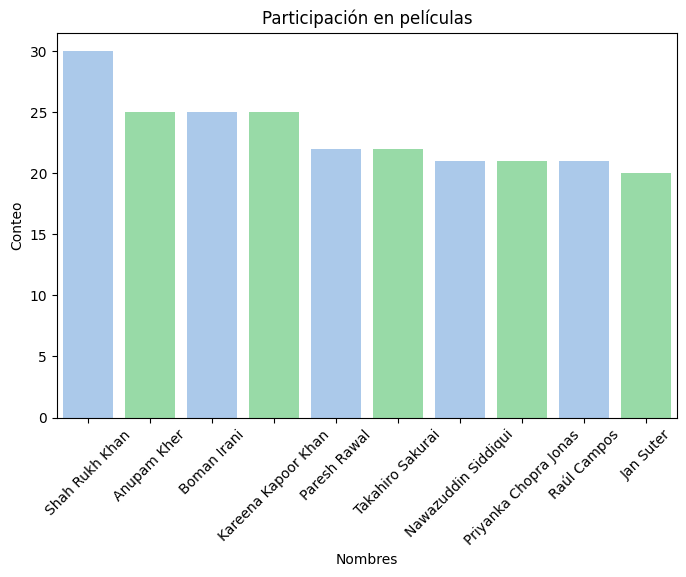

In [84]:
# Grafica de actor y directores
plt.figure(figsize=(8, 5))
sns.barplot(x=names.index, y=names.values, palette=["#a1c9f4", "#8de5a1"])
plt.title("Participación en películas")
plt.xlabel("Nombres")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.show()

In [85]:
#participación de actores y directores
actor = df_actores[df_actores["role"] == "ACTOR"]["name"].value_counts().head(5)


director = df_actores[df_actores["role"] == "DIRECTOR"]["name"].value_counts().head(5)


print(f'{"Top 5 de actores con más participación:" ,actor}')


print(f'{"Top 5 de directores con más participación:",director}')


('Top 5 de actores con más participación:', name
Shah Rukh Khan         30
Anupam Kher            25
Kareena Kapoor Khan    25
Boman Irani            25
Paresh Rawal           22
Name: count, dtype: int64)
('Top 5 de directores con más participación:', name
Raúl Campos     21
Jan Suter       20
Jay Karas       16
Marcus Raboy    15
Ryan Polito     13
Name: count, dtype: int64)


___
___
___

#*Mejores películas de Netflix*



In [86]:
#Lectura de dataset: mejores peliculas de netflix

from google.colab import drive
drive.mount('/content/drive')

df_mejores_peli_netf = pd.read_csv('/content/drive/MyDrive/Prueba Axity/mejores peliculas Netflix.csv')
df_mejores_peli_netf.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US


#Columnas relevantes para el análisis del dataset "Mejores películas de netflix"

*SCORE (Top 10 de las mejores peliculas de acuerdo a su score)

*REALEASE_YEAR (Año en el que salieron las peliculas del top 10)

*MAIN_GENRE  (Género de las peliculas del top 10)



In [87]:
#Investigamos con cuantas filas y columnas cuenta el dataset
num_filas_np, num_columnas_np = df_mejores_peli_netf.shape

print("Número de filas:", num_filas_np)
print("Número de columnas:", num_columnas_np)

Número de filas: 387
Número de columnas: 7


In [88]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in df_mejores_peli_netf.columns:
    print(nombre_columna)

Nombres de las columnas:
TITLE
RELEASE_YEAR
SCORE
NUMBER_OF_VOTES
DURATION
MAIN_GENRE
MAIN_PRODUCTION


In [89]:
#Info de dataset
df_mejores_peli_netf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TITLE            387 non-null    object 
 1   RELEASE_YEAR     387 non-null    int64  
 2   SCORE            387 non-null    float64
 3   NUMBER_OF_VOTES  387 non-null    int64  
 4   DURATION         387 non-null    int64  
 5   MAIN_GENRE       387 non-null    object 
 6   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.3+ KB


#Top 10 de las mejores películas

In [90]:
# Imprimir title y score
top_10= df_mejores_peli_netf.sort_values(by='SCORE', ascending=False)[['TITLE', 'SCORE','MAIN_GENRE','RELEASE_YEAR']].head(10)
top_10


,TITLE,SCORE,MAIN_GENRE,RELEASE_YEAR
0,David Attenborough: A Life on Our Planet,9.0,documentary,2020
2,Forrest Gump,8.8,drama,1994
1,Inception,8.8,scifi,2010
3,Anbe Sivam,8.7,comedy,2003
4,Bo Burnham: Inside,8.7,comedy,2021
5,Saving Private Ryan,8.6,drama,1998
10,Dave Chappelle: Sticks & Stones,8.4,comedy,2019
12,Black Friday,8.4,crime,2004
11,3 Idiots,8.4,comedy,2009
13,Super Deluxe,8.4,thriller,2019


In [91]:
#Promedio de score por género
df_mejores_peli_netf.groupby('MAIN_GENRE')['SCORE'].mean().sort_values(ascending=False)


MAIN_GENRE
war            7.800000
scifi          7.771429
documentary    7.760000
action         7.700000
comedy         7.606897
western        7.557143
fantasy        7.484211
drama          7.477483
crime          7.466667
thriller       7.466102
romance        7.400000
sports         7.400000
horror         7.350000
animation      7.200000
musical        7.150000
Name: SCORE, dtype: float64

In [92]:
# Mejor año y promedio del Score

df_score_pelis= df_mejores_peli_netf.groupby('RELEASE_YEAR')['SCORE'].mean().sort_values(ascending=False)
print(df_score_pelis)


RELEASE_YEAR
1976    8.300000
1975    8.200000
1973    8.100000
1987    7.950000
1982    7.900000
1984    7.850000
2003    7.800000
1964    7.800000
1994    7.800000
1990    7.800000
1979    7.800000
2001    7.783333
2012    7.750000
1971    7.700000
1989    7.700000
1967    7.700000
2004    7.642857
2014    7.642105
1995    7.600000
2010    7.587500
1997    7.566667
2013    7.562500
1998    7.560000
2007    7.528571
2011    7.520000
2009    7.510000
1954    7.500000
1986    7.500000
1961    7.500000
2015    7.489474
2019    7.478378
2002    7.475000
2006    7.471429
2016    7.457692
2017    7.448571
2021    7.438462
2008    7.400000
2020    7.368421
2018    7.353846
1993    7.350000
2005    7.300000
1966    7.300000
2022    7.280000
1992    7.200000
2000    7.200000
1999    7.100000
1996    7.000000
1980    6.900000
1991    6.900000
Name: SCORE, dtype: float64


In [93]:
#Máx y mín
max_score_peli= df_score_pelis.max()
min_score_peli= df_score_pelis.min()

print(f'{"La mejor calificación de una película es de:" ,max_score_peli}')
print(f'{"La peor calificación de una película es de:" ,min_score_peli}')


('La mejor calificación de una película es de:', 8.3)
('La peor calificación de una película es de:', 6.9)


In [94]:
#Rango score
rango_score_peli= df_score_pelis.max()-df_score_pelis.min()
print(rango_score_peli)

1.4000000000000004


In [95]:
#Media truncada eliminando el 10% de datos al inicio y al final

media_truncada = stats.trim_mean(df_score_pelis, 0.10)

print(media_truncada)

7.551580657312365


In [96]:
#Datos
print(f'Minimo: {df_score_pelis.min()}')
print(f"P20: {df_score_pelis.quantile(.1)}")
print(f'P25: {df_score_pelis.quantile(.25)}')
print(f'P50: {df_score_pelis.median()}')
print(f'P75: {df_score_pelis.quantile(.75)}')
print(f'P90: {df_score_pelis.quantile(.9)}')
print(f'Maximo: {df_score_pelis.max()}')

Minimo: 6.9
P20: 7.2
P25: 7.4
P50: 7.52
P75: 7.75
P90: 7.86
Maximo: 8.3


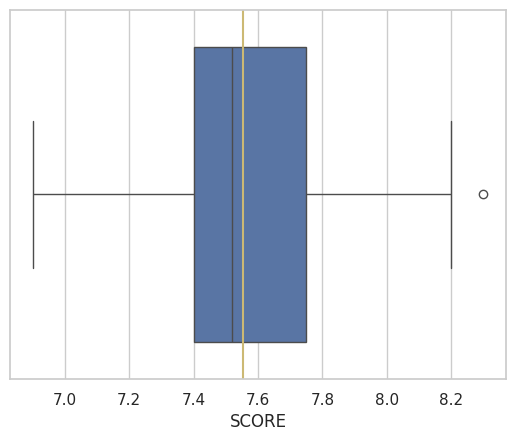

In [97]:
#Gráfico boxplot para ver resumen de datos del score
ax=sns.set(style="whitegrid")
sns.boxplot(x=df_score_pelis)
plt.axvline(df_score_pelis.mean(),c='y')

La gráfica boxplot nos muestra los rangos de los datos en el score, podemos notar el valor min y máx en el score. Se nota de manera gráfica también los percentiles (bordes de la caja) y la media (línea amarilla).

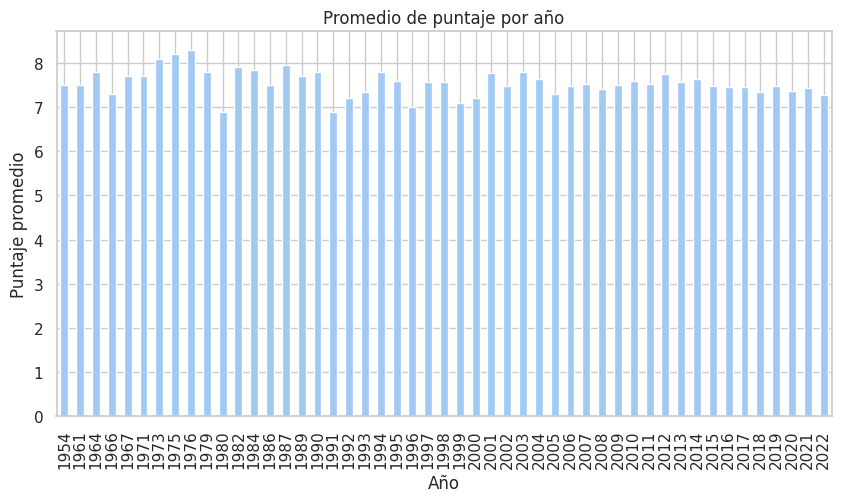

In [98]:

# Grafico de puntaje por año
df_mejores_peli_netf.groupby('RELEASE_YEAR')['SCORE'].mean().plot(kind='bar', figsize=(10, 5), color = '#a1c9f4')
plt.title('Promedio de puntaje por año')
plt.xlabel('Año')
plt.ylabel('Puntaje promedio')
plt.show()


In [99]:
#Promedio de score por país
df_mejores_peli_netf.groupby('MAIN_PRODUCTION')['SCORE'].mean().sort_values(ascending=False).head(10)

MAIN_PRODUCTION
CD    8.200000
UA    8.100000
ZA    8.100000
TR    7.842857
NZ    7.800000
MX    7.700000
TH    7.600000
MW    7.600000
IN    7.592174
GB    7.568966
Name: SCORE, dtype: float64

In [100]:
#Se asigna una dataframe  a SCORE
df_score_pelis = df_mejores_peli_netf['SCORE']
print(df_score_pelis)

0      9.0
1      8.8
2      8.8
3      8.7
4      8.7
      ... 
382    6.9
383    6.9
384    6.9
385    6.9
386    6.9
Name: SCORE, Length: 387, dtype: float64


In [101]:
#Seleccionamos nombre de columnas para el análisis de correlación entre variables para saber el mejor SCORE
columnas_seleccionadas_peli = [
    "RELEASE_YEAR",
    "SCORE",
    "NUMBER_OF_VOTES",
    "DURATION"]

In [102]:
#Se crea el dataframe
df_correlacion_peli = df_mejores_peli_netf[columnas_seleccionadas_peli]
df_correlacion_peli

,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION
0,2020,9.0,31180,83
1,2010,8.8,2268288,148
2,1994,8.8,1994599,142
3,2003,8.7,20595,160
4,2021,8.7,44074,87
...,...,...,...,...
382,2021,6.9,19706,113
383,2019,6.9,47603,108
384,1986,6.9,329656,110
385,2022,6.9,21328,138


In [103]:
#Correlación
df_correlacion_peli.corr()

,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION
RELEASE_YEAR,1.000000,-0.149726,-0.212883,-0.105250
SCORE,-0.149726,1.000000,0.343683,0.125037
NUMBER_OF_VOTES,-0.212883,0.343683,1.000000,0.103768
DURATION,-0.105250,0.125037,0.103768,1.000000


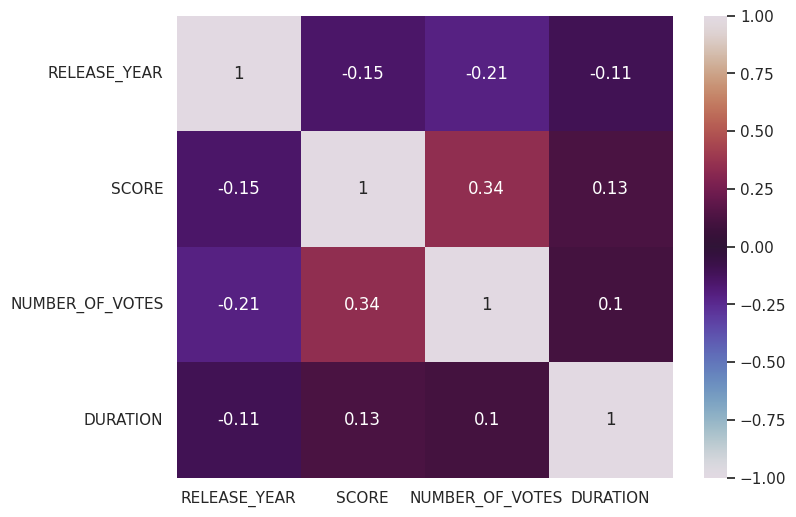

In [104]:
#Heatmap
plt.figure(figsize=(8,6))
ax= sns.heatmap(df_correlacion_peli.corr(),vmin=-1,vmax=1,annot=True, cmap= "twilight")

Nos damos cuenta que gracial al heatmap, las varibales que tienen más correlación es Número de votos con el score, mientras que las otras variables son débiles, el número score alto es debido a las personas que más votarón.

___
___
___

#*MEJORES SHOWS*

In [105]:
#Lectura de dataset: mejores shows de netflix

from google.colab import drive
drive.mount('/content/drive')

df_mejores_shows = pd.read_csv('/content/drive/MyDrive/Prueba Axity/mejores Shows Netflix.csv')
df_mejores_shows.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,The Last Dance,2020,9.1,108321,50,1,documentary,US


#Columnas relevantes para el análisis del dataset "Mejores shows"

*SCORE (Top 10 de los mejores shows de acuerdo a su score)

*REALEASE_YEAR (Año en el que salieron los mejores shows del top 10)

*MAIN_GENRE  (Género de shows del top 10)

____



In [106]:
#Investigamos con cuantas filas y columnas cuenta el dataset
num_filas_np, num_columnas_np = df_mejores_shows.shape

print("Número de filas:", num_filas_np)
print("Número de columnas:", num_columnas_np)

Número de filas: 246
Número de columnas: 8


In [107]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in df_mejores_shows.columns:
    print(nombre_columna)

Nombres de las columnas:
TITLE
RELEASE_YEAR
SCORE
NUMBER_OF_VOTES
DURATION
NUMBER_OF_SEASONS
MAIN_GENRE
MAIN_PRODUCTION


In [108]:
#Info de dataset
df_mejores_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              246 non-null    object 
 1   RELEASE_YEAR       246 non-null    int64  
 2   SCORE              246 non-null    float64
 3   NUMBER_OF_VOTES    246 non-null    int64  
 4   DURATION           246 non-null    int64  
 5   NUMBER_OF_SEASONS  246 non-null    int64  
 6   MAIN_GENRE         246 non-null    object 
 7   MAIN_PRODUCTION    246 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 15.5+ KB


#*TOP MEJORES SHOWS*

In [109]:
#  Imprimir title y score
top_10= df_mejores_shows.sort_values(by='SCORE', ascending=False)[['TITLE', 'SCORE','MAIN_GENRE','RELEASE_YEAR']].head(10)
top_10

,TITLE,SCORE,MAIN_GENRE,RELEASE_YEAR
0,Breaking Bad,9.5,drama,2008
2,Our Planet,9.3,documentary,2019
3,Kota Factory,9.3,drama,2019
1,Avatar: The Last Airbender,9.3,scifi,2005
4,The Last Dance,9.1,documentary,2020
5,Arcane,9.1,action,2021
6,Attack on Titan,9.0,scifi,2013
7,Hunter x Hunter,9.0,drama,2011
8,DEATH NOTE,9.0,scifi,2006
9,Seinfeld,8.9,comedy,1989


In [110]:
#Promedio de score por género
df_mejores_shows.groupby('MAIN_GENRE')['SCORE'].mean().sort_values(ascending=False)


MAIN_GENRE
western        8.600000
reality        8.450000
documentary    8.357143
animation      8.175000
scifi          8.115556
drama          8.113415
action         8.085714
comedy         8.069767
crime          7.985000
war            7.875000
thriller       7.850000
romance        7.700000
Name: SCORE, dtype: float64

In [111]:
# Mejor año y promedio del Score

best_score_shows= df_mejores_shows.groupby('RELEASE_YEAR')['SCORE'].mean().sort_values(ascending=False)
print(best_score_shows)

RELEASE_YEAR
1989    8.900000
1998    8.900000
1969    8.800000
1999    8.800000
2006    8.640000
2001    8.600000
2003    8.433333
1997    8.400000
2002    8.400000
2005    8.375000
2007    8.350000
2008    8.250000
2013    8.227273
2022    8.200000
2011    8.144444
2019    8.140000
2010    8.140000
2015    8.129167
1993    8.100000
2017    8.088889
2018    8.069231
1995    8.050000
2000    8.050000
2009    8.033333
2012    8.028571
2016    7.980000
2014    7.930769
2020    7.870000
2021    7.866667
2004    7.800000
Name: SCORE, dtype: float64


In [112]:
#Se asigna una dataframe  a SCORE
df_score_shows = df_mejores_shows['SCORE']
print(df_score_shows)

0      9.5
1      9.3
2      9.3
3      9.3
4      9.1
      ... 
241    7.5
242    7.5
243    7.5
244    7.5
245    7.5
Name: SCORE, Length: 246, dtype: float64


In [113]:
#Máx y mín
max_score_shows= df_score_shows.max()
min_score_shows= df_score_shows.min()

print(f'{"La mejor calificación de un show es de:" ,max_score_shows}')
print(f'{"La peor calificación de un show es de:" ,min_score_shows}')


('La mejor calificación de un show es de:', 9.5)
('La peor calificación de un show es de:', 7.5)


In [114]:
#Rango score
rango_score_show= df_score_shows.max()-df_score_shows.min()
print(rango_score_show)

2.0


In [115]:
#Media truncada eliminando el 10% de datos al inicio y al final

media_truncada_show = stats.trim_mean(df_score_shows, 0.10)

print(media_truncada)

7.551580657312365


In [116]:
#Datos
print(f'Minimo: {df_score_shows.min()}')
print(f"P20: {df_score_shows.quantile(.1)}")
print(f'P25: {df_score_shows.quantile(.25)}')
print(f'P50: {df_score_shows.median()}')
print(f'P75: {df_score_shows.quantile(.75)}')
print(f'P90: {df_score_shows.quantile(.9)}')
print(f'Maximo: {df_score_shows.max()}')

Minimo: 7.5
P20: 7.5
P25: 7.7
P50: 8.0
P75: 8.4
P90: 8.7
Maximo: 9.5


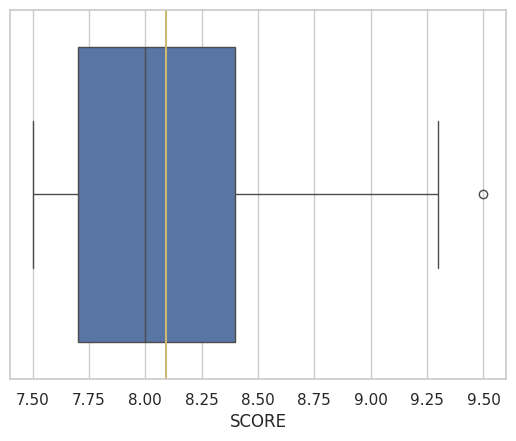

In [117]:
#Gráfico boxplot para ver resumen de datos del score
ax=sns.set(style="whitegrid")
sns.boxplot(x=df_score_shows)
plt.axvline(df_score_shows.mean(),c='y')

La gráfica boxplot nos muestra los rangos de los datos en el score, podemos notar el valor min y máx en el score. Se nota de manera gráfica también los percentiles (bordes de la caja) y la media (línea amarilla).

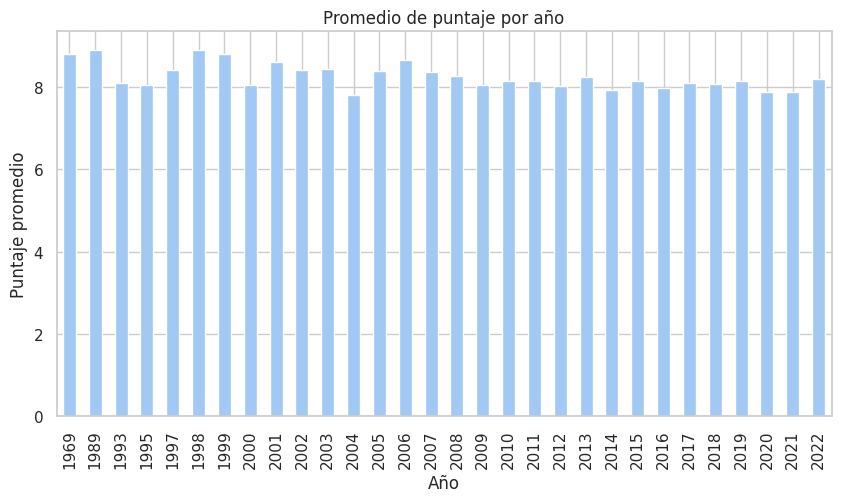

In [118]:
# Grafico de puntaje por año
df_mejores_shows.groupby('RELEASE_YEAR')['SCORE'].mean().plot(kind='bar', figsize=(10, 5), color = '#a1c9f4')
plt.title('Promedio de puntaje por año')
plt.xlabel('Año')
plt.ylabel('Puntaje promedio')
plt.show()

In [119]:
#Promedio de score por país
df_mejores_shows.groupby('MAIN_PRODUCTION')['SCORE'].mean().sort_values(ascending=False).head(10)

MAIN_PRODUCTION
IN    8.800000
AU    8.600000
IL    8.300000
JP    8.288462
GB    8.262963
DK    8.100000
DE    8.100000
US    8.050746
CA    8.038462
KR    8.022222
Name: SCORE, dtype: float64

In [120]:
#Seleccionamos nombre de columnas para el análisis de correlación entre variables para saber el mejor SCORE
columnas_seleccionadas_shows = [
    "RELEASE_YEAR",
    "SCORE",
    "NUMBER_OF_VOTES",
    "DURATION",
    "NUMBER_OF_SEASONS"]

In [121]:
#Se crea el dataframe
df_correlacion_shows = df_mejores_shows[columnas_seleccionadas_peli]
df_correlacion_shows

,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION
0,2008,9.5,1727694,48
1,2005,9.3,297336,24
2,2019,9.3,41386,50
3,2019,9.3,66985,42
4,2020,9.1,108321,50
...,...,...,...,...
241,2018,7.5,27516,48
242,2017,7.5,282373,58
243,2021,7.5,100575,46
244,2022,7.5,41393,61


In [122]:
#Correlación
df_correlacion_shows.corr()

,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION
RELEASE_YEAR,1.000000,-0.271559,-0.156311,0.216146
SCORE,-0.271559,1.000000,0.369596,-0.078219
NUMBER_OF_VOTES,-0.156311,0.369596,1.000000,0.099772
DURATION,0.216146,-0.078219,0.099772,1.000000


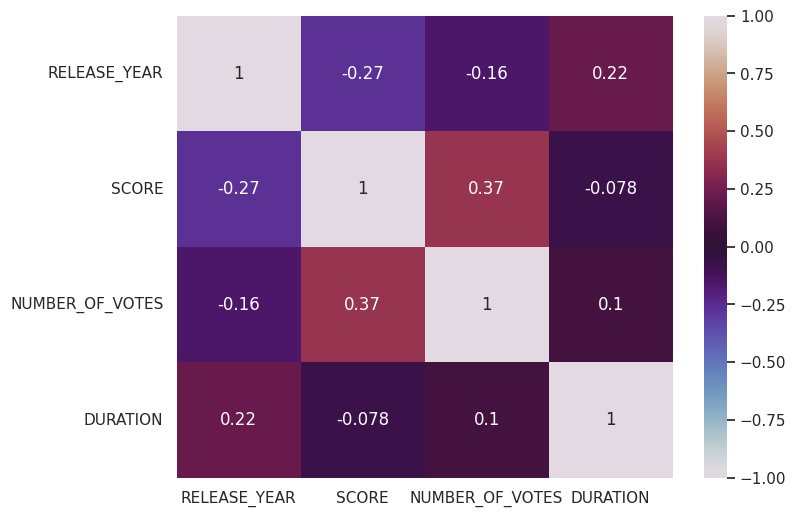

In [123]:
#Heatmap
plt.figure(figsize=(8,6))
ax= sns.heatmap(df_correlacion_shows.corr(),vmin=-1,vmax=1,annot=True, cmap= "twilight")

Podemos observar que las variables con más relación es "número de votos con score" teniendo el 0.37 de correlación.